In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [21]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

print(max_temp.mean())
print('---------------------\n')
print(min_temp.mean())

39.25
---------------------

25.0


In [16]:
period = np.arange(1,13)
period

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [18]:
df = pd.DataFrame(data= {'max_temp':max_temp, 'min_temp':min_temp}, index=period)
df.min

<bound method DataFrame.min of     max_temp  min_temp
1         39        21
2         41        23
3         43        27
4         47        28
5         49        32
6         51        35
7         45        31
8         38        28
9         37        21
10        29        19
11        27        17
12        25        18>

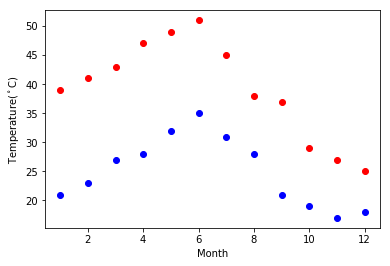

In [19]:
plt.xlabel('Month')
plt.ylabel('Temperature($^\circ$C)')

plt.plot(period, df.min_temp, 'bo',  )
plt.plot(period, df.max_temp,'ro')

In [7]:
np.random.normal(size=period.size)

array([-1.23034971,  1.16438259,  0.47773286, -1.08146097, -0.54847943,
       -0.13769362,  0.44928797, -0.77187073, -0.62273963, -1.23237646,
       -0.55539084, -0.61994749])

In [28]:
from scipy import optimize
def annual_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(annual_temps, period, max_temp, [39, 1, 0])
res_min, cov_min = optimize.curve_fit(annual_temps, period, min_temp, [25, 1, 0])

# res_max is the optimized average, amplitude, timeoffset

print(res_max,'\n\n', cov_max)
print('\n------------------------------------------\n')
print(res_min,'\n\n', cov_min)

[ 39.25       -11.01878016 -11.02888904] 

 [[ 7.38600934e-01  2.66359971e-09  3.19793653e-10]
 [ 2.66359971e-09  1.47720188e+00 -1.32301075e-08]
 [ 3.19793653e-10 -1.32301075e-08  4.43795752e-02]]

------------------------------------------

[25.         -7.86539574  0.48952563] 

 [[ 1.92715722e-01  4.84848900e-16 -2.76702772e-09]
 [ 4.84848900e-16  3.85431448e-01 -3.87023375e-09]
 [-2.76702772e-09 -3.87023375e-09  2.27252585e-02]]


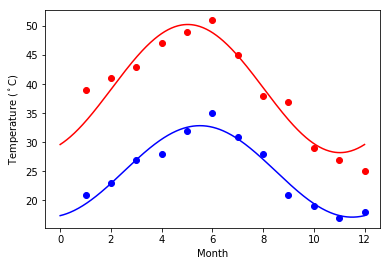

In [29]:
days = np.linspace(0, 12, num=365)

plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.plot(period, max_temp, 'ro', days, annual_temps(days, *res_max), 'r-')
plt.plot(period, min_temp, 'bo', days, annual_temps(days, *res_min), 'b-')

#plt.show()

### Problem 2

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [11]:
titanic = pd.read_csv('titanic_original.csv')

In [12]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


(-1.1129882265764364,
 1.1006184869798303,
 -1.1087172349156638,
 1.1153965287301455)

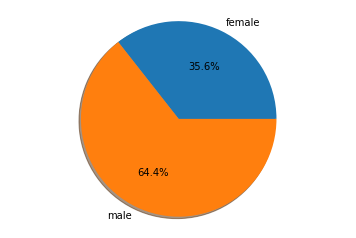

In [13]:
sex = titanic.groupby('sex').size()
#sex.plot.pie(y=sex.index, autopct='%1.1f%%')
fig1, ax1 = plt.subplots()
plt.pie(sex, labels = sex.index, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

(-1.1129882265764364,
 1.1006184869798303,
 -1.1087172349156638,
 1.1153965287301455)

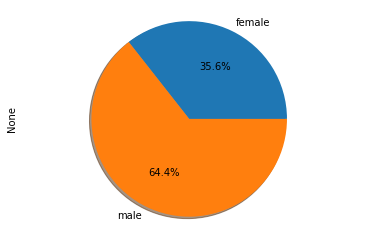

In [14]:
sex.plot.pie(y=sex, autopct='%1.1f%%', shadow=True).axis('equal')

### Problem 3

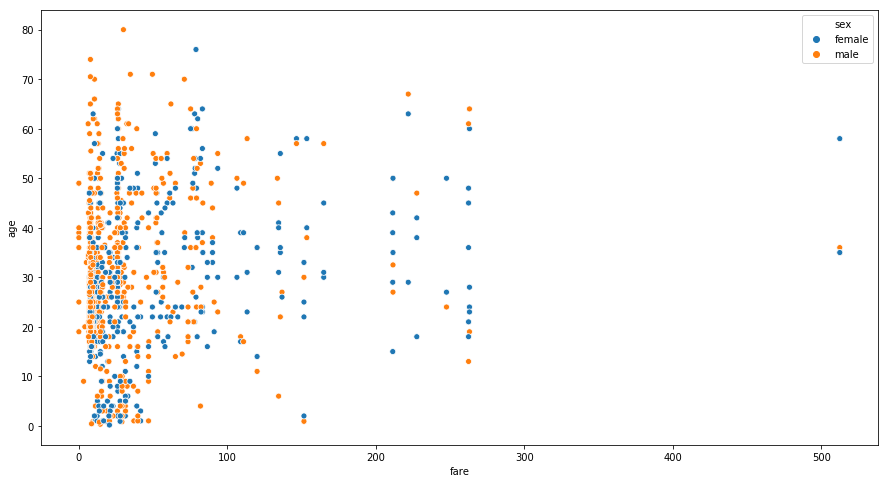

In [15]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.scatterplot(x='fare', y='age', data=titanic, hue='sex')